In [1]:
#Using NumPy, mathematical and logical operations on arrays can be performed.
import numpy as np 
#for data manipulation and analysis.
import pandas as pd

In [3]:
#data pre-processing helper functions
!pip install easypreprocessing

In [4]:
from easypreprocessing import EasyPreProcessing
#used for data visualization and exploratory data analysis
import seaborn as sns
#data visualization library
import matplotlib
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
from google.colab import files

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
uploaded=files.upload()

Saving train.csv to train.csv


Easypreprocessing is a library used for common ML related preprocessing activities.

In [6]:
prep = EasyPreProcessing('train.csv')


**Initialization Parameters**

1.  output            - Set output variable/dependent variable
2.  dates.features    - Set datetime field names (optional)

For example:
1.  output = 'column_name'
2.  dates.features = ['date_field_1','date_field_2']
        

In [7]:
prep.info



**General Template**
<code>
from easypreprocessing import EasyPreProcessing
prep = EasyPreProcessing('filename_here.csv')
prep.df
prep.output = 'output_variable_here'
prep.remove_blank()
prep.missing_values
prep.categorical.impute()
prep.numerical.impute()
prep.categorical.encode()
prep.correlation()
prep.standardize()
X_train, X_test, y_train, y_test = prep.split()
</code>


**Categorical Preprocessing**
<table>
<tr>
<td>categorical.fields</td><td>Display all categorical field names</td>
</tr>
<tr>
<td>categorical.unique</td><td>Display unique/distinct categorical values</td>
</tr>
<tr>
<td>categorical.impute()</td><td>Handle categorical missing values. Parameters {'mean', 'medium', 'mode'}</td>
</tr>
<tr>
<td>categorical.encode()</td><td>Encode categorical features. Parameters {'le': LabelEncoding, 'ohe': OneHotEncoding}</td>
</tr>
</table>

**Numerical Preprocessing**
<table>
<tr>
<td>numerical.fields</td><td>Display all numerical field names</td>
</tr>
<tr>
<td>numerical.impute()</td><td>Handle numerical missing values. Parameters {'mean', 'medium', 'mode'}</td>
</tr>
</table>

**Date Preprocessing**
<table>
<tr>
<td>dates.features</td><td>Define list of all datetime feature names</td>
</tr>
<tr>
<td>dates.split_datetime()</td><td>Split all datetime features into discrete fields (Year, Month, Day, Hour, Minute)</td>
</tr>
</table>

**General Preprocessing**
<table>
<tr>
<td>missing_values</td><td>Display missing value report</td>
</tr>
<tr>
<td>remove_blank()</td><td>Remove empty/blank columns</td>
</tr>
<tr>
<td>correlation()</td><td>Display correlation heatmap</td>
</tr>
<tr>
<td>standardize()</td><td>Standardize entire dataset except dependent variable</td>
</tr>
<tr>
<td>encode_output()</td><td>Encode dependent feature/output variable</td>
</tr>
<tr>
<td>over_sample()</td><td>Oversample dataset. Parameters {'smote': SMOTE, 'ros': RandomOverSample}</td>
</tr>
<tr>
<td>clustering.apply()</td><td>Cluster dataset using elbow plot</td>
</tr>
</table>
        

# Handling Null Values

In [8]:
prep.categorical.fields

['week']

In [9]:
prep.numerical.fields

['record_ID', 'store_id', 'units_sold']

In [10]:
prep.missing_values

record_ID     0
week          0
store_id      0
units_sold    0
dtype: int64

In [12]:
prep.numerical.impute()

Numerical features imputated successfully.


In [13]:
#showing the data frame
prep.df

,record_ID,week,store_id,units_sold
0,1.0,17/01/11,8091.0,20.0
1,2.0,17/01/11,8091.0,28.0
2,3.0,17/01/11,8091.0,19.0
3,4.0,17/01/11,8091.0,44.0
4,5.0,17/01/11,8091.0,52.0
...,...,...,...,...
150145,212638.0,9/7/2013,9984.0,38.0
150146,212639.0,9/7/2013,9984.0,30.0
150147,212642.0,9/7/2013,9984.0,31.0
150148,212643.0,9/7/2013,9984.0,12.0


Create a new column 'key' for unique identification. This is done in order to handle the duplicate data in 'week' column.

In [14]:
prep.dataset['key'] = prep.df['week'].astype(str) + '_' + prep.df['store_id'].astype(str) 

Removing columns that are not helpful for time series predictions.

In [16]:
!prep.dataset = prep.df.drop(['record_ID', 'week', 'store_id', 'sku_id', 'total_price', 'base_price', 'is_featured_sku', 'is_display_sku'], axis=1)

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `prep.dataset = prep.df.drop(['record_ID', 'week', 'store_id', 'sku_id', 'total_price', 'base_price', 'is_featured_sku', 'is_display_sku'], axis=1)'


Summing units_sold group by key.

In [17]:
prep.dataset = prep.df.groupby('key').sum()

In [18]:
prep.df

,record_ID,store_id,units_sold
key,,,
1/1/2013_8023.0,3506107.0,168483.0,2025.0
1/1/2013_8058.0,2504707.0,120870.0,682.0
1/1/2013_8063.0,3171714.0,153197.0,535.0
1/1/2013_8091.0,1501738.0,72819.0,210.0
1/1/2013_8094.0,4005755.0,194256.0,782.0
...,...,...,...
9/7/2013_9890.0,2763071.0,128570.0,955.0
9/7/2013_9909.0,2975873.0,138726.0,926.0
9/7/2013_9954.0,3613935.0,169218.0,582.0


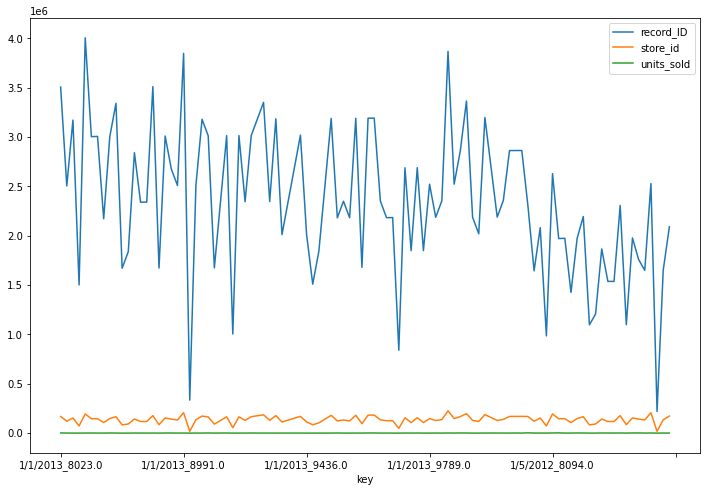

In [19]:
prep.df[:100].plot(figsize=(12,8))

# Converting supervised dataset

A time series is a sequence of numbers that are ordered by a time index. This can be thought of as a list or column of ordered values.

A supervised learning problem is comprised of input patterns (X) and output patterns (y), such that an algorithm can learn how to predict the output patterns from the input patterns.

A key function to help transform time series data into a supervised learning problem is the Pandas shift() function. We can repeat this process with shifts of 2, 3, and more, how we could create long input sequences (X) that can be used to forecast an output value (y).




*   ```units_sold``` becomes target variable
*   ```day_1```, ```day_2```, ```day_3```, ```day_4``` becomes input



We will train our model to predict sales based on previous 4 days.

In [20]:
prep.df['day_1'] = prep.df['units_sold'].shift(-1)
prep.df['day_2'] = prep.df['units_sold'].shift(-2)
prep.df['day_3'] = prep.df['units_sold'].shift(-3)
prep.df['day_4'] = prep.df['units_sold'].shift(-4)

In [21]:
prep.df

,record_ID,store_id,units_sold,day_1,day_2,day_3,day_4
key,,,,,,,
1/1/2013_8023.0,3506107.0,168483.0,2025.0,682.0,535.0,210.0,782.0
1/1/2013_8058.0,2504707.0,120870.0,682.0,535.0,210.0,782.0,1357.0
1/1/2013_8063.0,3171714.0,153197.0,535.0,210.0,782.0,1357.0,524.0
1/1/2013_8091.0,1501738.0,72819.0,210.0,782.0,1357.0,524.0,362.0
1/1/2013_8094.0,4005755.0,194256.0,782.0,1357.0,524.0,362.0,1546.0
...,...,...,...,...,...,...,...
9/7/2013_9890.0,2763071.0,128570.0,955.0,926.0,582.0,1573.0,662.0
9/7/2013_9909.0,2975873.0,138726.0,926.0,582.0,1573.0,662.0,NaN
9/7/2013_9954.0,3613935.0,169218.0,582.0,1573.0,662.0,NaN,NaN


Remove NA data

In [22]:
df = prep.df.dropna()

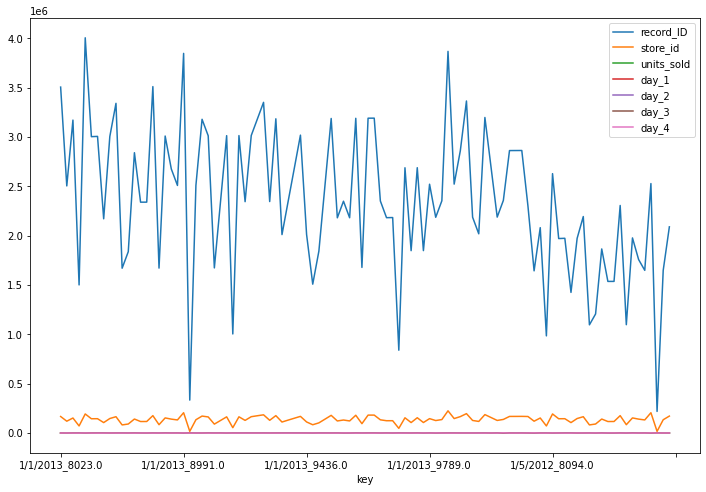

In [23]:
df[:100].plot(figsize=(12,8))

# Train-Test Split

x Train and y Train become data for the machine learning, capable to create a model.

Once the model is created, input x Test and the output should be equal to y Test.

The more closely the model output is to y Test: the more accurate the model is.

In [24]:
x1, x2, x3, x4, y = df['day_1'], df['day_2'], df['day_3'], df['day_4'], df['units_sold']
x1, x2, x3, x4, y = np.array(x1), np.array(x2), np.array(x3), np.array(x4), np.array(y)
x1, x2, x3, x4, y = x1.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1), x4.reshape(-1,1), y.reshape(-1,1)

#Then split, lets take 15% for testing set (whats left for training).
split_percentage = 15

test_split = int(len(df)*(split_percentage/100))
x = np.concatenate((x1, x2, x3, x4), axis=1)
X_train,X_test,y_train,y_test = x[:-test_split],x[-test_split:],y[:-test_split],y[-test_split:]

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8395, 4)
(1481, 4)
(8395, 1)
(1481, 1)


#Applying Models

At first we try to apply Linear Regression. 

Linear regression is a model that captures the linear relationship between variables, one labeled as the dependent variable and the other(s) labeled as the independent variable(s).



In [26]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_pred_linear_regression=regressor.predict(X_test)

In [27]:
print("R Sq. Score for training set Linear Regression is :", regressor.score(X_train,y_train))
print("R Sq. Score for testing set Linear Regression is :", regressor.score(X_test,y_test))

#A negative 𝑅2 means that the model fitted your data extremely bad. 

R Sq. Score for training set Linear Regression is : 0.0168406950010056
R Sq. Score for testing set Linear Regression is : 0.015809777176647777


# Random Forest Regression

Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.

In [28]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
y_pred.size

1481

In [30]:
print("R Sq. Score for Random Forest Regression :", rf_regressor.score(X_test, y_test))

R Sq. Score for Random Forest Regression : 0.5708710908276287


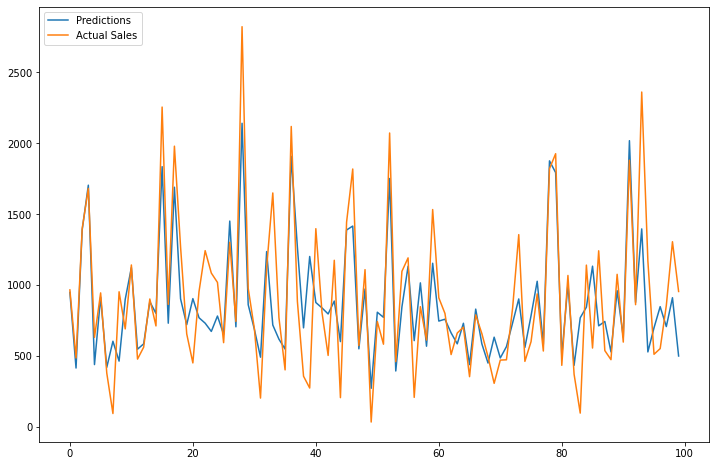

In [31]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(y_pred[-100:], label='Predictions')
plt.plot(y_test[-100:], label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

# XGBoost Regression

Extreme Gradient Boosting (XGBoost) is an open-source library that provides an efficient and effective implementation of the gradient boosting algorithm.

In [32]:
import xgboost
xgb_regressor = xgboost.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

y_pred2 = xgb_regressor.predict(X_test)

[16:23:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [33]:
print("R Sq. Score for XGBoost :", xgb_regressor.score(X_test, y_test))

R Sq. Score for XGBoost : 0.2954263947908228


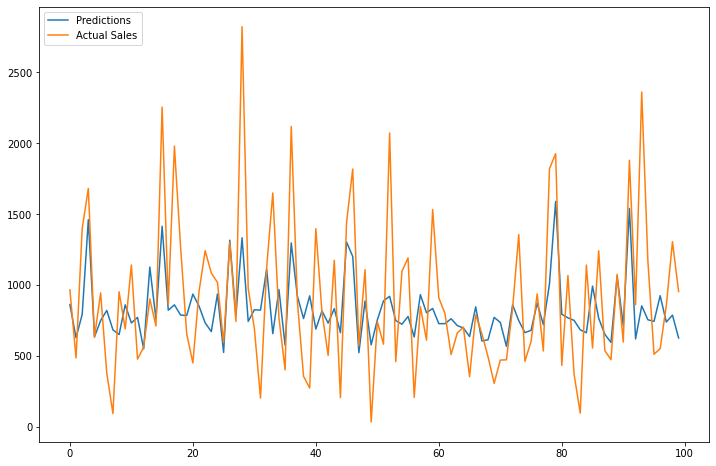

In [34]:
import matplotlib.pyplot as plt
plt.plot(y_pred2[-100:], label='Predictions')
plt.plot(y_test[-100:], label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

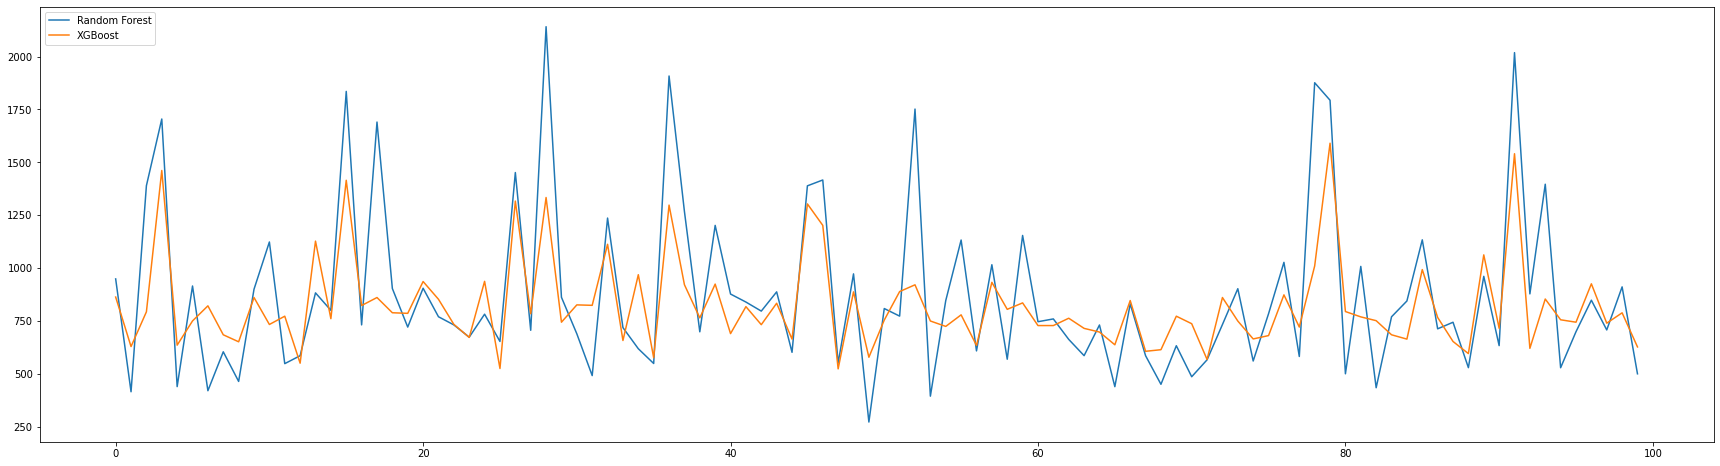

In [36]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,8)
plt.plot(y_pred[-100:], label='Random Forest')
plt.plot(y_pred2[-100:], label='XGBoost')
plt.legend(loc="upper left")
plt.show()

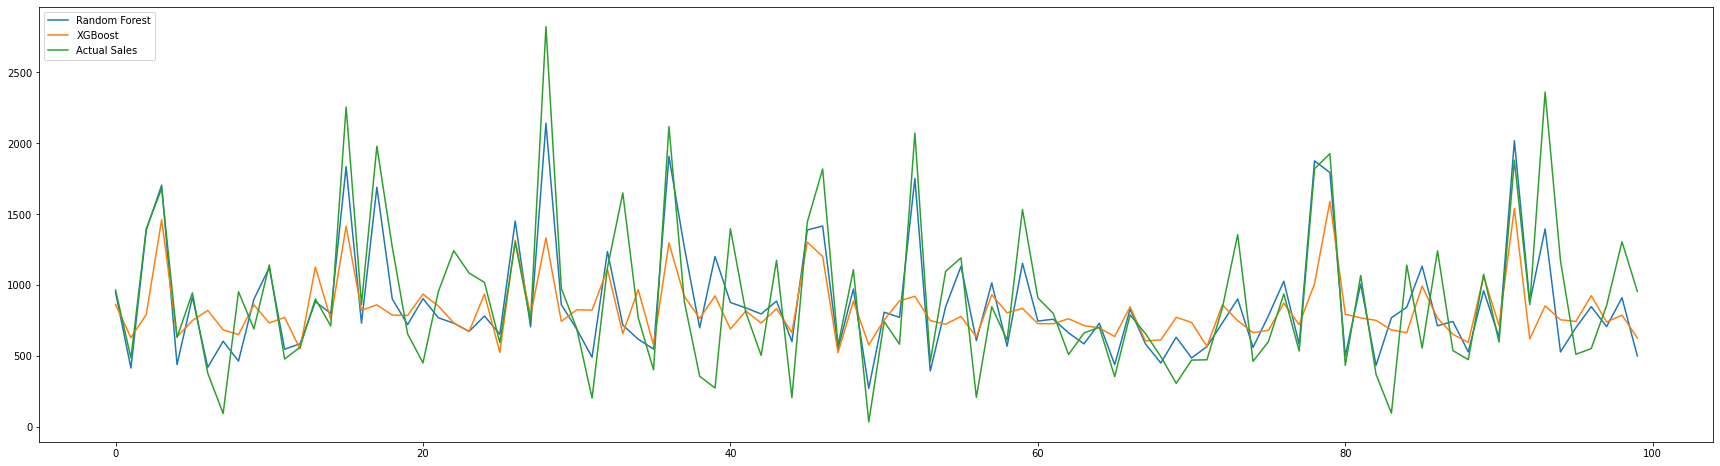

In [37]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,8)
plt.plot(y_pred[-100:], label='Random Forest')
plt.plot(y_pred2[-100:], label='XGBoost')
plt.plot(y_test[-100:], label='Actual Sales')
plt.legend(loc="upper left")
plt.show()